In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import arange
from matplotlib.ticker import FuncFormatter
from decimal import *

## 1. Introduction 

Using python and data science our purpose at this work is to compare two of UFRN's courses: **BTI** and **CET**.

Both courses have a similar structure, are in the technological field and have heavy financial investiments per year. For these reasons our study tries to show similarities and differences in specifics fiels:

- Status of students
- Scores in equivalent disciplines
- Department expenses
- Number of students in each department 
- Amount expend per student
- Amount expent at IMD per graduate students and technical students
- Courses expenses 

By using [UFRN's open data](http://dados.ufrn.br) , we were capable to get the necessary datasets containing the information used to our analysis. 

## 2. Getting the datasets 

First of all, we selected the csv files that we needed, downloaded it and then created the datasets .

In [40]:
alunos_url16 = 'https://goo.gl/g1sZVa'
alunos16 = pd.read_csv(alunos_url16, sep = ';')

gastos_url = 'https://bit.ly/2wwszPf'
gastos = pd.read_csv(gastos_url, sep =';')

cursos_url = 'https://bit.ly/2rwgfc4'
cursos = pd.read_csv(cursos_url, sep = ";")

departamentos_url = 'https://bit.ly/2ryY2dL'
departamentos = pd.read_csv(departamentos_url, sep = ';')

turmas161_url = 'https://goo.gl/MFuhNz'
turmas161 = pd.read_csv(turmas161_url, sep = ';')

turmas162_url = 'https://goo.gl/qSDpFe'
turmas162 = pd.read_csv(turmas162_url, sep = ';')

notas161_url = 'https://goo.gl/96o1xn'
notas161 = pd.read_csv(notas161_url, sep = ';')

notas162_url = 'https://goo.gl/uxAJBe'
notas162 = pd.read_csv(notas162_url, sep = ';')

docentes_url = 'https://goo.gl/LdPmyf'
docentes = pd.read_csv(docentes_url, sep = ';')

disciplinas_url = 'https://goo.gl/gBY8eT'
disciplinas = pd.read_csv(disciplinas_url, sep = ';',usecols=["id_componente","codigo","nivel","nome","unidade_responsavel"])

## 3. Status of students
We will remove all the missing data at students dataset and separated it by students of the two analyzed courses in graduation program.

Next, is generated a graphic bar showing the status of these students, the y-axis shows the ṕercentual of students with some status in relation to the total number os students.  

In [41]:
alunos16.dropna(inplace = True)

alunosBTI = alunos16[(alunos16.nome_curso == "TECNOLOGIA DA INFORMAÇÃO") & (alunos16.nivel_ensino == "GRADUAÇÃO")]
alunosCET = alunos16[(alunos16.nome_curso == "CIÊNCIAS E TECNOLOGIA") & (alunos16.nivel_ensino == "GRADUAÇÃO")]

alunosBTI = alunosBTI[~alunosBTI.nome_discente.duplicated()]
alunosCET = alunosCET[~alunosCET.nome_discente.duplicated()]


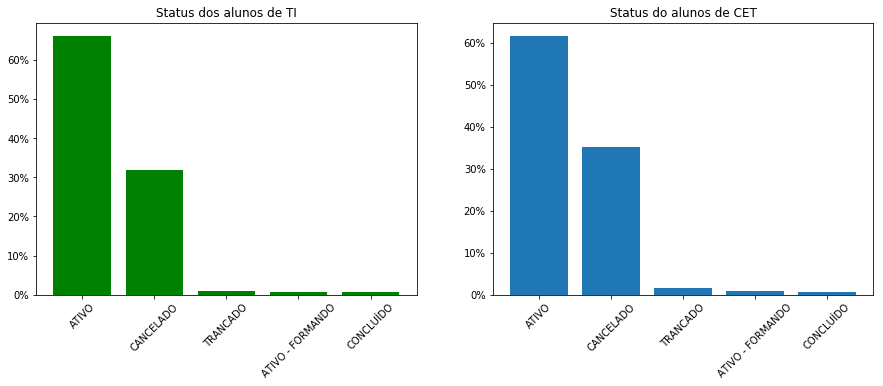

In [42]:
statusBTI = alunosBTI.status.value_counts()
#nome_statusBTI = alunosBTI.status[~alunosBTI.status.duplicated()]
nome_statusBTI = statusBTI.keys()

statusCET = alunosCET.status.value_counts()
nome_statusCET = statusCET.keys()

soma = 0
for i in statusBTI:
    soma += i

d = {}

for i, j in enumerate(statusBTI):
    d[i] = j/soma * 100

sBTI = pd.Series(d)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Status dos alunos de TI")
bar_position = arange(5)
ax1.bar(bar_position, sBTI, align='center' , color = 'g')
ax1.set_xticklabels(nome_statusBTI , rotation = 45)
ax1.set_xticks(range(0,5))
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax1.yaxis.set_major_formatter(formatter)

soma = 0
for i in statusCET:
    soma += i

d = {}

for i, j in enumerate(statusCET):
    d[i] = j/soma * 100

sCET = pd.Series(d)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Status do alunos de CET")
ax2.bar(bar_position, sCET, align='center')
ax2.set_xticklabels(nome_statusCET, rotation = 45)
ax2.set_xticks(range(0,5))
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax2.yaxis.set_major_formatter(formatter)

plt.show()

## 4. Scores in equivalent disciplines

Now, we compare two disciplines that are commom two both courses: **VGA** and **CALCULUS**.

For comparison purpose, we looked only for those discipline status:
- **Approved**
- **Approved by score**
- **Reproved** 
- **Reproved by score**
- **Reproved by score and faults**

In the end, a graphic bar shows the result of the comparisons. 

In [19]:
turmas_concat = pd.concat([turmas161,turmas162])
turmas_concat.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)

turmas_concat.id_componente = turmas_concat.id_componente.astype(str)
disciplinas.dropna(inplace=True)
disciplinas = disciplinas[~disciplinas.id_componente.duplicated()]

colunas = ["id_turma","codigo","nivel_ensino","nome","unidade_responsavel",
          "situacao_turma","capacidade_aluno","descricao_horario"]

# merge os dois dataframes utilizando como base a coluna id_componenteb
merge_turmas_disciplinas = pd.merge(turmas_concat, disciplinas, on='id_componente')[colunas]

merge_turmas_disciplinas.dropna(inplace=True)

turmas_imd = merge_turmas_disciplinas[merge_turmas_disciplinas.codigo.str.contains("IMD")]
turmas_ect = merge_turmas_disciplinas[merge_turmas_disciplinas.codigo.str.contains("ECT")]

turmas_imd = turmas_imd[(turmas_imd.situacao_turma == "CONSOLIDADA") & (turmas_imd.nivel_ensino == "GRADUAÇÃO")]
turmas_imd.capacidade_aluno = turmas_imd.capacidade_aluno.astype(np.int64)

turmas_ect = turmas_ect[(turmas_ect.situacao_turma == "CONSOLIDADA") & (turmas_ect.nivel_ensino == "GRADUAÇÃO")]
turmas_ect.capacidade_aluno = turmas_ect.capacidade_aluno.astype(np.int64)

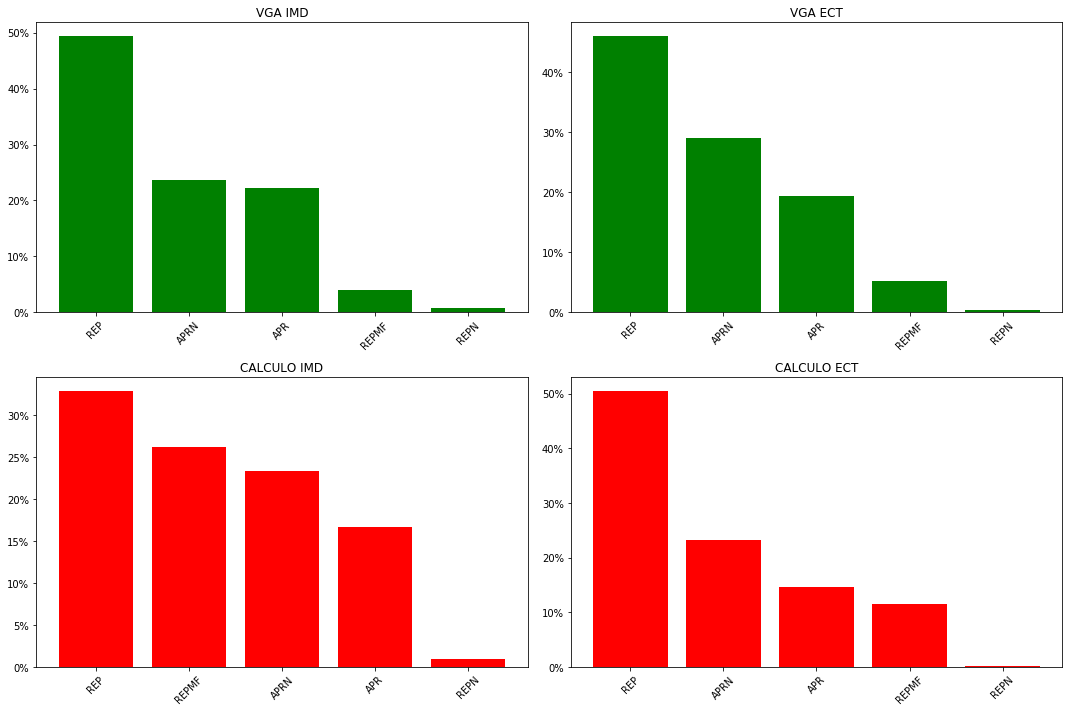

In [20]:
notas_concat = pd.concat([notas161,notas162])


colunas = ["APROVADO POR NOTA", "APROVADO", "REPROVADO", "REPROVADO POR MÉDIA E POR FALTAS", "REPROVADO POR NOTA" , "REPROVADO POR FALTAS", "REPROVADO POR NOTA E FALTA"]
notas_imd = notas_concat[(notas_concat.id_turma.isin(turmas_imd.id_turma)) & (notas_concat.descricao.isin(colunas))]
notas_imd_merge = pd.merge(notas_imd, turmas_imd, on = 'id_turma')
del notas_imd_merge['Unnamed: 10']

notas_ect = notas_concat[(notas_concat.id_turma.isin(turmas_ect.id_turma)) & (notas_concat.descricao.isin(colunas))]
notas_ect_merge = pd.merge(notas_ect, turmas_ect, on = 'id_turma')
del notas_ect_merge['Unnamed: 10']

vga_imd = notas_imd_merge[notas_imd_merge.nome == "VETORES E GEOMETRIA ANALÍTICA"]
vga_imd = vga_imd[~vga_imd.discente.duplicated()]
vga_imd = vga_imd.descricao.value_counts()
nome_vga_imd = vga_imd.keys()

vga_ect = notas_ect_merge[notas_ect_merge.nome == "VETORES E GEOMETRIA ANALÍTICA"]
vga_ect = vga_ect[~vga_ect.discente.duplicated()]
vga_ect = vga_ect.descricao.value_counts()
nome_vga_ect = vga_ect.keys()

calc_imd = notas_imd_merge[notas_imd_merge.nome == "CÁLCULO DIFERENCIAL E INTEGRAL I"]
calc_imd = calc_imd[~calc_imd.discente.duplicated()]
calc_imd = calc_imd.descricao.value_counts()
nome_calc_imd = calc_imd.keys()

calc_ect = notas_ect_merge[notas_ect_merge.nome == "CÁLCULO I"]
calc_ect = calc_ect[~calc_ect.discente.duplicated()]
calc_ect = calc_ect.descricao.value_counts()
nome_calc_ect = calc_ect.keys()

soma = 0
for i in vga_imd:
    soma += i

d = {}

for i, j in enumerate(vga_imd):
    d[i] = j/soma * 100

vga_BTI = pd.Series(d)

nome = ['REP', 'APRN', 'APR',
       'REPMF', 'REPN']

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax1.set_title("VGA IMD")
bar_position = arange(5)
ax1.bar(bar_position, vga_BTI, align='center' , color = 'g')
ax1.set_xticklabels(nome , rotation = 45)
ax1.set_xticks(range(0,5))
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax1.yaxis.set_major_formatter(formatter)

soma = 0
for i in vga_ect:
    soma += i

d = {}

for i, j in enumerate(vga_ect):
    d[i] = j/soma * 100

vga_CET = pd.Series(d)

ax2 = fig.add_subplot(2,2,2)
ax2.set_title("VGA ECT")
bar_position = arange(5)
ax2.bar(bar_position, vga_CET, align='center' , color = 'g')
ax2.set_xticklabels(nome, rotation = 45)
ax2.set_xticks(range(0,5))
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax2.yaxis.set_major_formatter(formatter)

soma = 0
for i in calc_imd:
    soma += i

d = {}

for i, j in enumerate(calc_imd):
    d[i] = j/soma * 100

calc_BTI = pd.Series(d)

nome = ['REP', 'REPMF', 'APRN', 'APR', 'REPN']

ax3 = fig.add_subplot(2,2,3)
ax3.set_title("CALCULO IMD")
bar_position = arange(5)
ax3.bar(bar_position, calc_BTI, align='center' , color = 'r')
ax3.set_xticklabels(nome , rotation = 45)
ax3.set_xticks(range(0,5))
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax3.yaxis.set_major_formatter(formatter)

soma = 0
for i in calc_ect:
    soma += i

d = {}

for i, j in enumerate(calc_ect):
    d[i] = j/soma * 100

calc_ECT = pd.Series(d)

nome = ['REP', 'APRN', 'APR', 'REPMF','REPN']

ax4 = fig.add_subplot(2,2,4)
ax4.set_title("CALCULO ECT")
bar_position = arange(5)
ax4.bar(bar_position, calc_ECT, align='center' , color = 'r')
ax4.set_xticklabels(nome , rotation = 45)
ax4.set_xticks(range(0,5))
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax4.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

It is interesting to see that in VGA the results are very similar but in Calculus the situation is different. Besides the fact that in both the reprobation percetual is the biggest. 

## 5. Department expenses

Here we get the total department expenses of the two departments we want: **IMD** and **ECT**.

In the endm a graphic bar shows the expensives in millions of _reais_

In [21]:
imd = departamentos[departamentos.sigla == 'IMD']
id_imd = imd.id_unidade.values[0]
gastos_imd = gastos[gastos.id_unidade == id_imd]
gastos_imd_str = gastos_imd.valor
gastos_imd_str1 = []
gastos_imd_str2 = []
gastos_imd_quebrados = []
gastos_imd_float = []
gastos_imd_int = []
for i in gastos_imd_str:
    gastos_imd_str1.append(i.split("R$")[1].split(" "))
for i in gastos_imd_str1:
    for j in i:
        if j != '':
            gastos_imd_str2.append(j)
for i in gastos_imd_str2:
    gastos_imd_float.append((i.split(',')[0]))
    gastos_imd_quebrados.append(Decimal(i.split(',')[1])/100)
for i in gastos_imd_float:
    if len(i.split('.')) > 2:
        gastos_imd_int.append(int(i.split('.')[0]+i.split('.')[1]+i.split('.')[2]))
    elif len(i.split('.')) > 1:
        gastos_imd_int.append(int(i.split('.')[0]+i.split('.')[1]))
    else:
        gastos_imd_int.append(int(i.split('.')[0]))
gastos_totais_imd = sum(gastos_imd_int + gastos_imd_quebrados)
#int(gastos_totais_imd)

In [22]:
ect = departamentos[departamentos.sigla == 'ECT']
id_ect = ect.id_unidade.values[0]
gastos_ect = gastos[gastos.id_unidade == id_ect]
gastos_ect_str = gastos_ect.valor
gastos_ect_str1 = []
gastos_ect_str2 = []
gastos_ect_quebrados = []
gastos_ect_float = []
gastos_ect_int = []
for i in gastos_ect_str:
    gastos_ect_str1.append(i.split("R$")[1].split(" "))
for i in gastos_ect_str1:
    for j in i:
        if j != '':
            gastos_ect_str2.append(j)
for i in gastos_ect_str2:
    gastos_ect_float.append((i.split(',')[0]))
    gastos_ect_quebrados.append(Decimal(i.split(',')[1])/100)
for i in gastos_ect_float:
    if len(i.split('.')) > 2:
        gastos_ect_int.append(int(i.split('.')[0]+i.split('.')[1]+i.split('.')[2]))
    elif len(i.split('.')) > 1:
        gastos_ect_int.append(int(i.split('.')[0]+i.split('.')[1]))
    else:
        gastos_ect_int.append(int(i.split('.')[0]))
gastos_totais_ect = sum(gastos_ect_int + gastos_ect_quebrados)
#int(gastos_totais_ect)

<function matplotlib.pyplot.show>

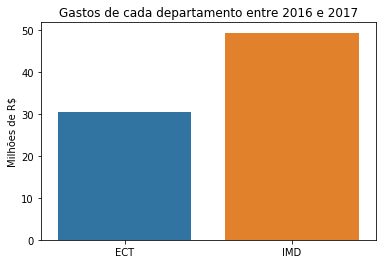

In [23]:
data=pd.DataFrame({"IMD":gastos_totais_imd, "ECT":gastos_totais_ect, "Labels":['IMD', 'ECT']})
ax= sns.barplot(data=data)
lim = [0,10, 20, 30, 40, 50, 60]
ax.set_yticklabels(lim)
ax.set_ylabel("Milhões de R$")
ax.set_title("Gastos de cada departamento entre 2016 e 2017")
plt.show

## 6. Number of students in each department and amount expent per student


Having the dataframe with all the students in each department, here we count to discover the number os students and then show in a graphic bar

<function matplotlib.pyplot.show>

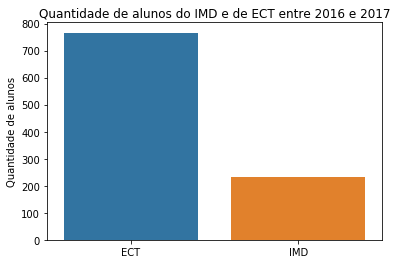

In [24]:
#alunos_IMD = alunos_concat[alunos_concat.id_unidade == id_imd]
#alunos_ECT = alunos_concat[alunos_concat.id_unidade == id_ect]
alunos_IMD_ativo = alunosBTI[alunosBTI.status == 'ATIVO']
alunos_ECT_ativo = alunosCET[alunosCET.status == 'ATIVO']
total_alunos_IMD = alunos_IMD_ativo.matricula.count()
total_alunos_ECT = alunos_ECT_ativo.matricula.count()
data=pd.DataFrame({"IMD":total_alunos_IMD, "ECT":total_alunos_ECT, "Labels":['IMD', 'ECT']})
ax= sns.barplot(data=data)
ax.set_ylabel("Quantidade de alunos")
ax.set_title("Quantidade de alunos do IMD e de ECT entre 2016 e 2017")
plt.show

An important thing that we discover comparing the two last graphics is that ECT even having more students, more then 3x the number of IMD, recevives almost 20 millions less than IMD.

This fact made us to question, how much was expented per student and for this we generated the next graphic, showing the colossal difference of investiments at these courses.

**In the last graphic was taken in consideration only graduation students the next one considers  technical students from IMD and that the department expends the same value for students independent if is a technical or graduation student**

<function matplotlib.pyplot.show>

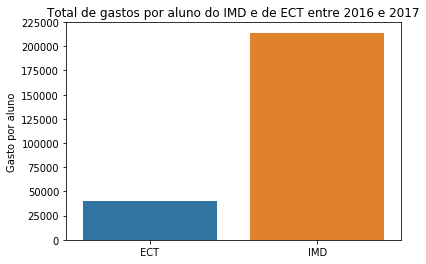

In [25]:
gasto_aluno_IMD = int(gastos_totais_imd/total_alunos_IMD)
gasto_aluno_ECT = int(gastos_totais_ect/total_alunos_ECT)
data=pd.DataFrame({"IMD":gasto_aluno_IMD, "ECT":gasto_aluno_ECT, "Labels":['IMD', 'ECT']})
ax= sns.barplot(data=data)
ax.set_ylabel("Gasto por aluno")
ax.set_title("Total de gastos por aluno do IMD e de ECT entre 2016 e 2017")
plt.show

## 7. Amount expent at IMD per graduate students and technical students

Knowing that IMD has students divided in two categories: graduation program and technical program. We decided see how much was spent in each categorie.

**Again we consider that the department expends the same value per student**

In [34]:
alunosCTMDa = alunos16[alunos16.nome_curso == 'CURSO TÉCNICO DA METRÓPOLE DIGITAL']
alunosBTIa =  alunos16[alunos16.nome_curso == 'TECNOLOGIA DA INFORMAÇÃO']
num_alunosCTMDa = alunosCTMDa.matricula.count()
num_alunosBTIa = alunosBTIa.matricula.count()
sum_BTI_CTMD = num_alunosBTIa+num_alunosCTMDa
percent_gasto_BTI = (num_alunosBTIa*100)/sum_BTI_CTMD
percent_gasto_CTMD = (num_alunosCTMDa*100)/sum_BTI_CTMD
gastos_BTI = float(gastos_totais_imd) * (percent_gasto_BTI/100)
gastos_CTMD = float(gastos_totais_imd) * (percent_gasto_CTMD/100)

<function matplotlib.pyplot.show>

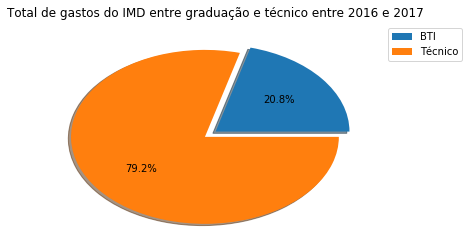

In [44]:
fig, ax = plt.subplots()
ax.pie([gastos_BTI, gastos_CTMD], explode=(0, 0.1), autopct='%1.1f%%', shadow=True)
ax.legend(loc='best',labels=['BTI', 'Técnico'], bbox_to_anchor=(1,1))
ax.set_title("Total de gastos do IMD entre graduação e técnico entre 2016 e 2017")
plt.show

<function matplotlib.pyplot.show>

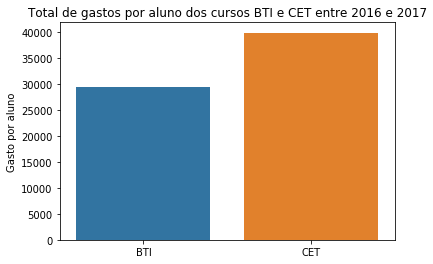

In [39]:
gasto_aluno_BTI = int(gastos_BTI/num_alunosBTIa)
gasto_aluno_CET = int(gastos_totais_ect/total_alunos_ECT)
data=pd.DataFrame({ "CET":gasto_aluno_CET, "BTI":gasto_aluno_BTI, "Labels":['CET', 'BTI']})
ax= sns.barplot(data=data)
ax.set_ylabel("Gasto por aluno")
ax.set_title("Total de gastos por aluno dos cursos BTI e CET entre 2016 e 2017")
plt.show